Below is a simulation of the KLS model. It was one of the earliest non-equilibrium systems studied in statistical physics.  The simulation is in 2 dimension.  We provide the simulation code and calculate the order parameter and show the phase transition between the ordered phase and the disordered phase

In [51]:
using PyCall
using Statistics
using PyPlot
np = pyimport("numpy")

PyObject <module 'numpy' from '/Users/honghaoyu/.julia/conda/3/aarch64/lib/python3.12/site-packages/numpy/__init__.py'>

In [53]:
function initialization(Ly, Lx, rho)
        #config = zeros(Ly, Lx)
        config = fill(-1, (Ly, Lx))
        pcount = 0
        numOfPart = convert(Int64, floor(Lx*Ly*rho))
        while (pcount < numOfPart)
            i = rand(1:Ly)
            j = rand(1:Lx)
            if (config[i, j] == -1)
                pcount += 1
                config[i, j] = 1
            end
        end
        checkNum(config, Ly, Lx)
        return config
end

initialization (generic function with 1 method)

In [55]:
#Horizontally ordered initial config
function initialization2(Ly, Lx, rho)
        #config = zeros(Ly, Lx)
        config = fill(-1, (Ly, Lx))
        numOfOneType = convert(Int64, floor(Lx*Ly*rho/2))
        counter = numOfOneType*2
        i, j = 1, 1
        while counter > 0
                if j == Lx
                    config[i, j] = 1
                    i += 1
                    j = 1
                    counter -= 1
                else
                    config[i, j] = 1
                    j += 1
                    counter -= 1
                end
        end
        return config
end

initialization2 (generic function with 1 method)

In [57]:
#Vertically ordered initial config with gap
function initialization3(Ly, Lx, rho)
        #config = zeros(Ly, Lx)
        config = fill(-1, (Ly, Lx))
        numOfOneType = convert(Int64, floor(Lx*Ly*rho/2))
        counter = numOfOneType*2
        i, j = 1, 1
        while counter > 0
            if i == Lx
                config[i, j] = 1
                j += 1
                i = 1
                counter -= 1
            else
                config[i, j] = 1
                i += 1
                counter -= 1
            end
        end
        return config
end

initialization3 (generic function with 1 method)

In [59]:
function moveCheck(config, Ly, Lx, Efield, beta)
    for i = 1:Ly*Lx
        a = rand(1: Ly)
        b = rand(1: Lx)
        if config[a, b] == 1
            dirc = rand(1: 4)
            if dirc == 1
                if config[a, 1+mod(b,Lx)] == -1
                    config =  mcmoveph(config, Ly, Lx, a, b, 1, Efield, beta)
                end
            end
            if dirc == 2
                if config[1+mod(a,Ly),b] == -1
                    config =  mcmoveph(config, Ly, Lx, a, b, 2, Efield, beta)
                end
            end
            if dirc == 3
                if config[a,1+mod(b-2,Lx)] == -1
                    config =  mcmoveph(config, Ly, Lx, a, b, 3, Efield, beta)
                end
            end
            if dirc == 4
                if config[1+mod(a-2,Ly),b] == -1
                    config =  mcmoveph(config, Ly, Lx, a, b, 4, Efield, beta)
                end
            end
        end
    end
    return config

end

moveCheck (generic function with 1 method)

In [61]:
function mcmoveph(config, Ly, Lx, a, b, dirc, Efield, beta)
    E = Efield
    s =  config[a, b]
    above = config[1+mod(a,Ly),b]
    right = config[a, 1+mod(b,Lx)]
    below = config[1+mod(a-2,Ly),b]
    left = config[a,1+mod(b-2,Lx)]
    """here are the definitions of moves"""
    if s == 1
        if dirc == 1
            nb1 = config[a,1+mod(b-2,Lx)]+config[1+mod(a,Ly),b]+config[1+mod(a-2,Ly),b] 
            nb2 = config[1+mod(a,Ly),1+mod(b,Lx)]+config[1+mod(a-2,Ly),1+mod(b,Lx)]+config[a,1+mod(b+1,Lx)]
            cost = 2*(s*nb1 + right*nb2)      
            if rand()< min(1, exp(-beta*cost))
                s, right = right, s
            end
        end
        if dirc == 2
            nb1 = config[a,1+mod(b-2,Lx)]+config[a, 1+mod(b,Lx)]+config[1+mod(a-2,Ly),b]
            nb2 = config[1+mod(a+1,Ly),b]+config[1+mod(a,Ly),1+mod(b,Lx)]+config[1+mod(a,Ly),1+mod(b-2,Lx)]
            cost = 2*(s*nb1 + above*nb2)
            if rand()< min(1, exp(-beta*(cost-E)))
                s, above = above, s
            end
        end
        if dirc == 3
            nb1 = config[1+mod(a,Ly),b]+config[a, 1+mod(b,Lx)]+config[1+mod(a-2,Ly),b]
            nb2 = config[1+mod(a,Ly),1+mod(b-2,Lx)]+config[a,1+mod(b-3,Lx)]+config[1+mod(a-2,Ly),1+mod(b-2,Lx)]
            cost = 2*(s*nb1 + left*nb2)
            if rand()< min(1, exp(-beta*cost))
                s, left = left, s
            end
        end
        if dirc == 4
            nb1 = config[1+mod(a,Ly),b]+config[a,1+mod(b-2,Lx)]+config[a, 1+mod(b,Lx)]
            nb2 = config[1+mod(a-3,Ly),b]+config[1+mod(a-2,Ly),1+mod(b,Lx)]+config[1+mod(a-2,Ly),1+mod(b-2,Lx)]
            cost = 2*(s*nb1 + below*nb2)
            if rand()< min(1, exp(-beta*(cost+E)))
                s, below = below, s
            end
        end
    end
    config[a, b] = s
    config[1+mod(a,Ly),b] = above 
    config[a, 1+mod(b,Lx)] = right
    config[1+mod(a-2,Ly),b] = below
    config[a,1+mod(b-2,Lx)] = left
    return config
end

mcmoveph (generic function with 1 method)

In [63]:
function orderParaPsiH(config, Ly, Lx)
        Psi = 0
        for j = 1:Ly
            for i = 1:Lx
                if config[i,j] == 1
                    Psi += exp(2*pi*1im*j/Ly)
                elseif config[i,j] == 0
                    Psi += exp(2*pi*1im*j/Ly)*(-1)
                end
            end
        end
        Psi = abs(Psi)
        Psi = Psi/(Lx*Ly)
        return Psi
end

orderParaPsiH (generic function with 1 method)

In [65]:
function orderParaPsiV(config, Ly, Lx)
        Psi = 0
        for j = 1:Ly
            for i = 1:Lx
                if config[i,j] == 1
                    Psi += exp(2*pi*1im*i/Ly)
                elseif config[i,j] == 0
                    Psi += exp(2*pi*1im*i/Ly)*(-1)
                end
            end
        end
        Psi = abs(Psi)
        Psi = Psi/(Lx*Ly)
        return Psi
end

orderParaPsiV (generic function with 1 method)

In [67]:
function checkNum(config, Ly, Lx)
    pcount = 0
    hcount = 0
    for i = 1:Ly
        for j = 1:Lx
            if config[i, j] == 1
                pcount += 1
            end
            if config[i, j] == -1
                hcount += 1
            end
        end
    end
end

checkNum (generic function with 1 method)

In [69]:
function configPlot(f, config, Ly, Lx, n_, i)
    sp =  f.add_subplot(1, 6, n_)    
    pcolor(config, cmap=plt.cm.Blues, edgecolors="black") 
    StepString = string("t = ", i)
    plt.title(StepString, fontsize=26)
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)
end

configPlot (generic function with 1 method)

In [71]:
function simulate(Ly, Lx, rho, Efield, temp, steps)
    config = initialization(Ly, Lx, rho)
    beta = 1.0/temp
    listOfPsiH, listOfPsiV = zeros(0), zeros(0)
    
    f = figure(figsize=(65, 10), dpi=80);    
    configPlot(f, config, Ly, Lx, 1, 0);
    
    MCTimeStep = steps
    for i = 1:MCTimeStep
        config = moveCheck(config, Ly, Lx, Efield, beta) 
        append!(listOfPsiH, orderParaPsiH(config, Ly, Lx))
        append!(listOfPsiV, orderParaPsiV(config, Ly, Lx))
        
        if i == Int(steps*0.0001)       
            configPlot(f, config, Ly, Lx, 2, i)
        end        
        if i == Int(steps*0.001)       
            configPlot(f, config, Ly, Lx, 3, i)
        end      
        if i == Int(steps*0.01)       
            configPlot(f, config, Ly, Lx, 4, i)
        end  
        if i == Int(steps*0.1)       
            configPlot(f, config, Ly, Lx, 5, i)
        end  
        if i == Int(steps)       
            configPlot(f, config, Ly, Lx, 6, i)
        end  
        
    end
    #FigPara = string("E",Efield,"Rho",rho,"temp",temp,"Size",Ly,Lx,".pdf")
    #plt.savefig(FigPara)
    return listOfPsiH, listOfPsiV
    #return config
end

simulate (generic function with 1 method)

In [145]:
function OvsTemp(Ly, Lx, rho, Efield, minTemp, maxTemp, steps)
    listOfOrderPsiH = zeros(0)
    listOfVarPsiH = zeros(0)
    OPPsiH = zeros(0)
    listOfOrderPsiV = zeros(0)
    listOfVarPsiV = zeros(0)
    OPPsiV = zeros(0)
    
    Temp = range(minTemp; stop=maxTemp, length=10)
    for temp in Temp
        println("Now the temperature value is given by ", temp)
        OPPsiH, OPPsiV = simulate(Ly, Lx, rho, Efield, temp, steps)
        append!(listOfOrderPsiH, Statistics.mean(OPPsiH[500000:end]))
        append!(listOfVarPsiH, Statistics.var(OPPsiH[500000:end]))
        append!(listOfOrderPsiV, Statistics.mean(OPPsiV[500000:end]))
        append!(listOfVarPsiV, Statistics.var(OPPsiV[500000:end]))
    end

    psiH = np.array(listOfOrderPsiH)
    psiH = np.transpose(psiH)
        
    psiHVar = np.array(listOfVarPsiH)
    psiHVar = np.transpose(psiHVar)
        
    
    psiV = np.array(listOfOrderPsiV)
    psiV = np.transpose(psiV)
        
    psiVVar = np.array(listOfVarPsiV)
    psiVVar = np.transpose(psiVVar)
        
    
    return psiH, psiHVar, psiV, psiVVar
end

OvsTemp (generic function with 1 method)

Now the temperature value is given by 1.8
2.1555555555555554e value is given by 
Now the temperature value is given by 2.511111111111111
2.8666666666666667e value is given by 
Now the temperature value is given by 3.2222222222222223
3.577777777777778re value is given by 
Now the temperature value is given by 3.933333333333333
4.288888888888889re value is given by 
Now the temperature value is given by 4.644444444444445
5.0 the temperature value is given by 


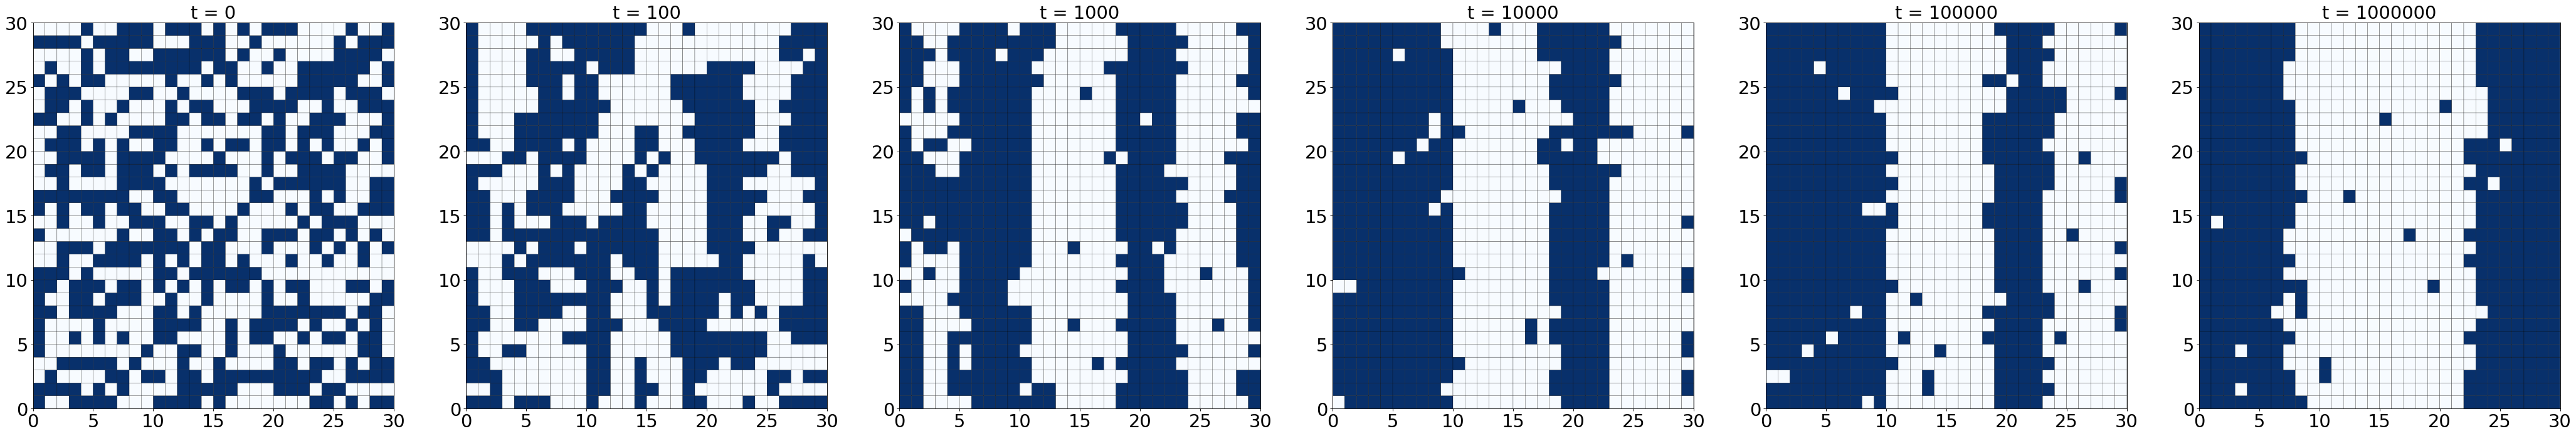

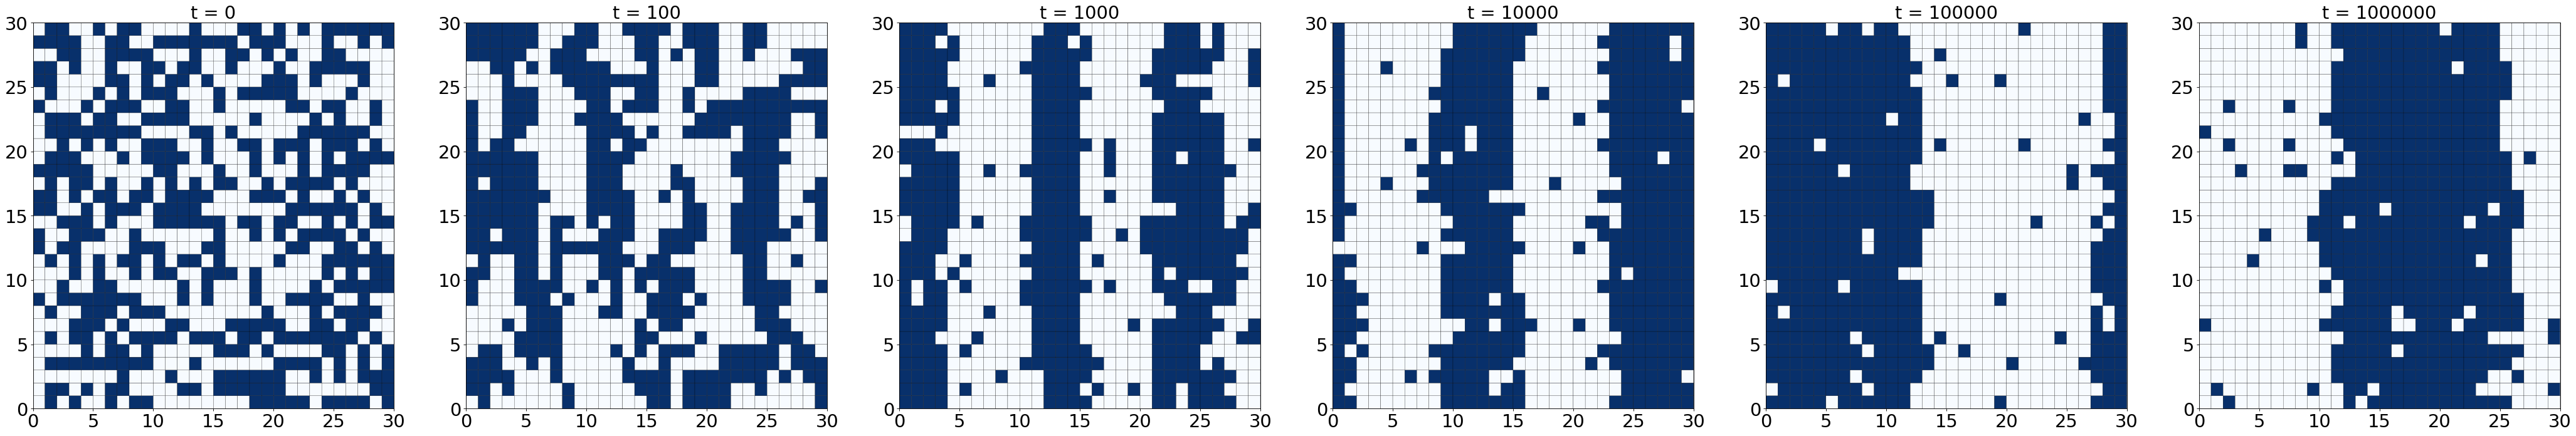

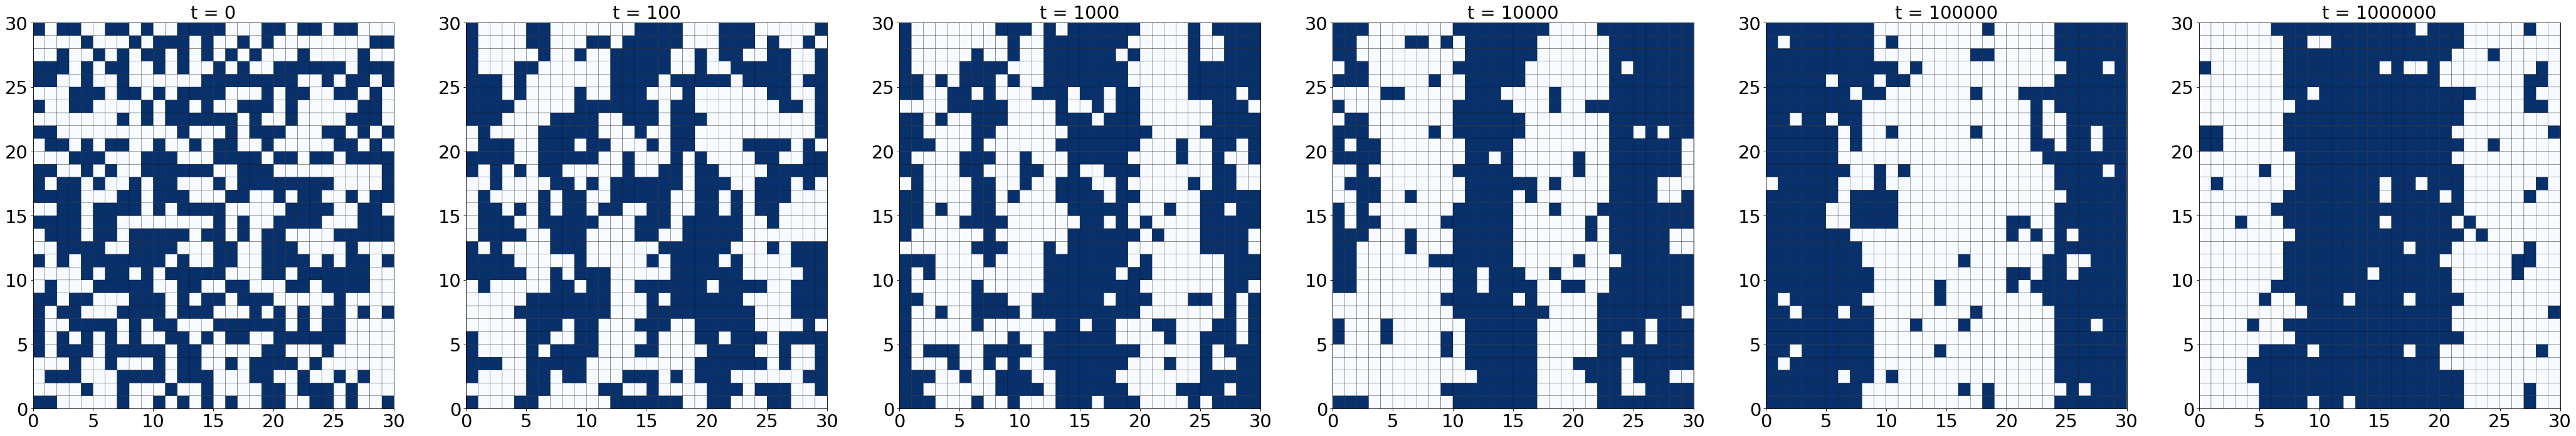

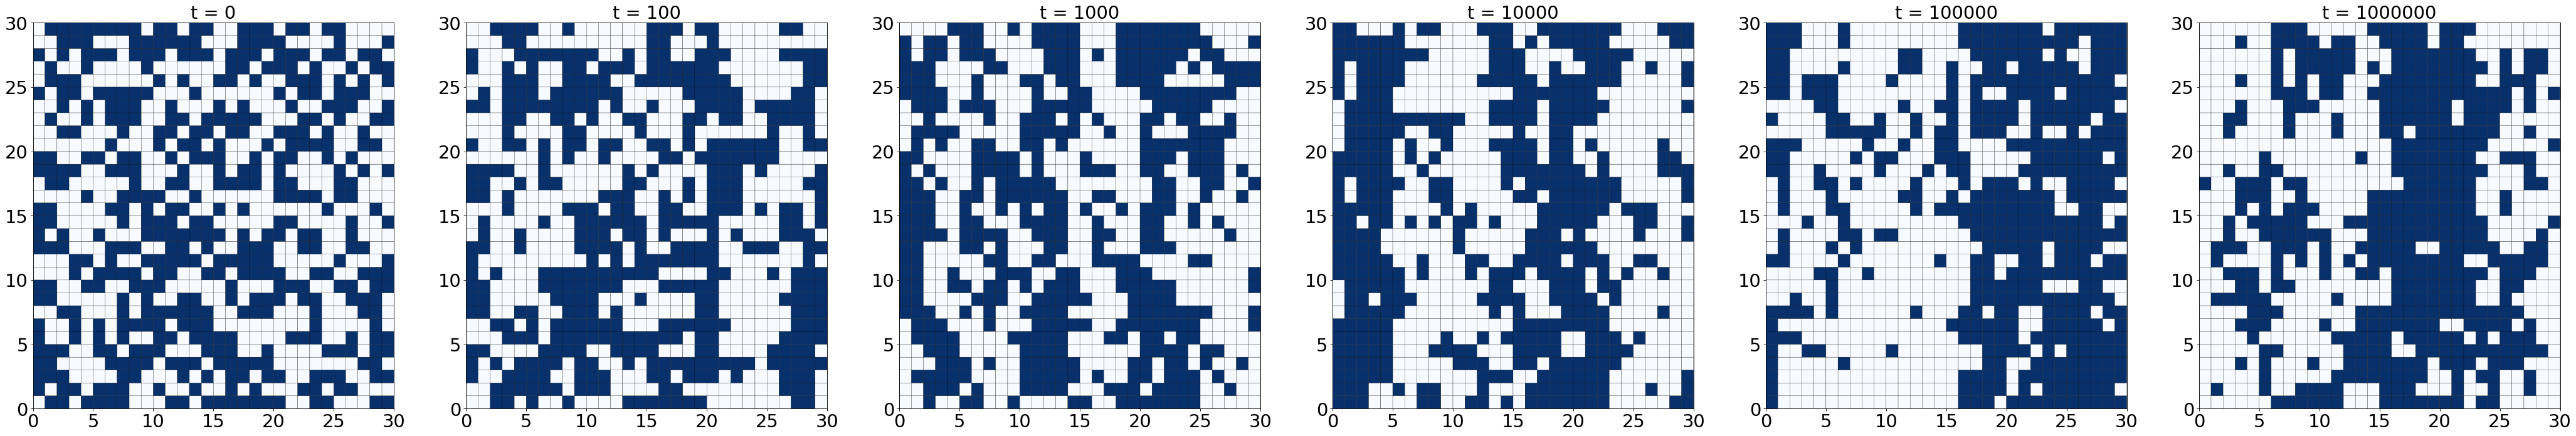

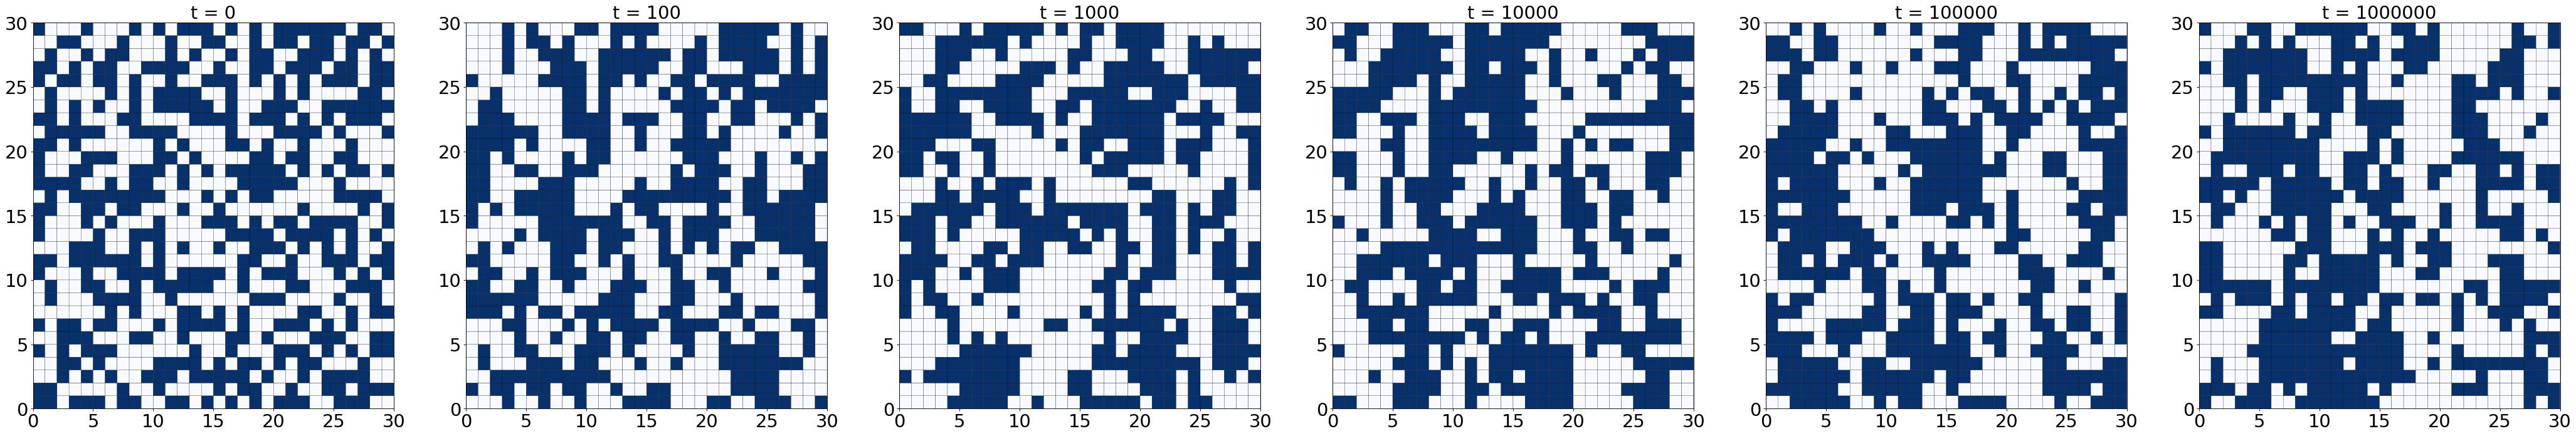

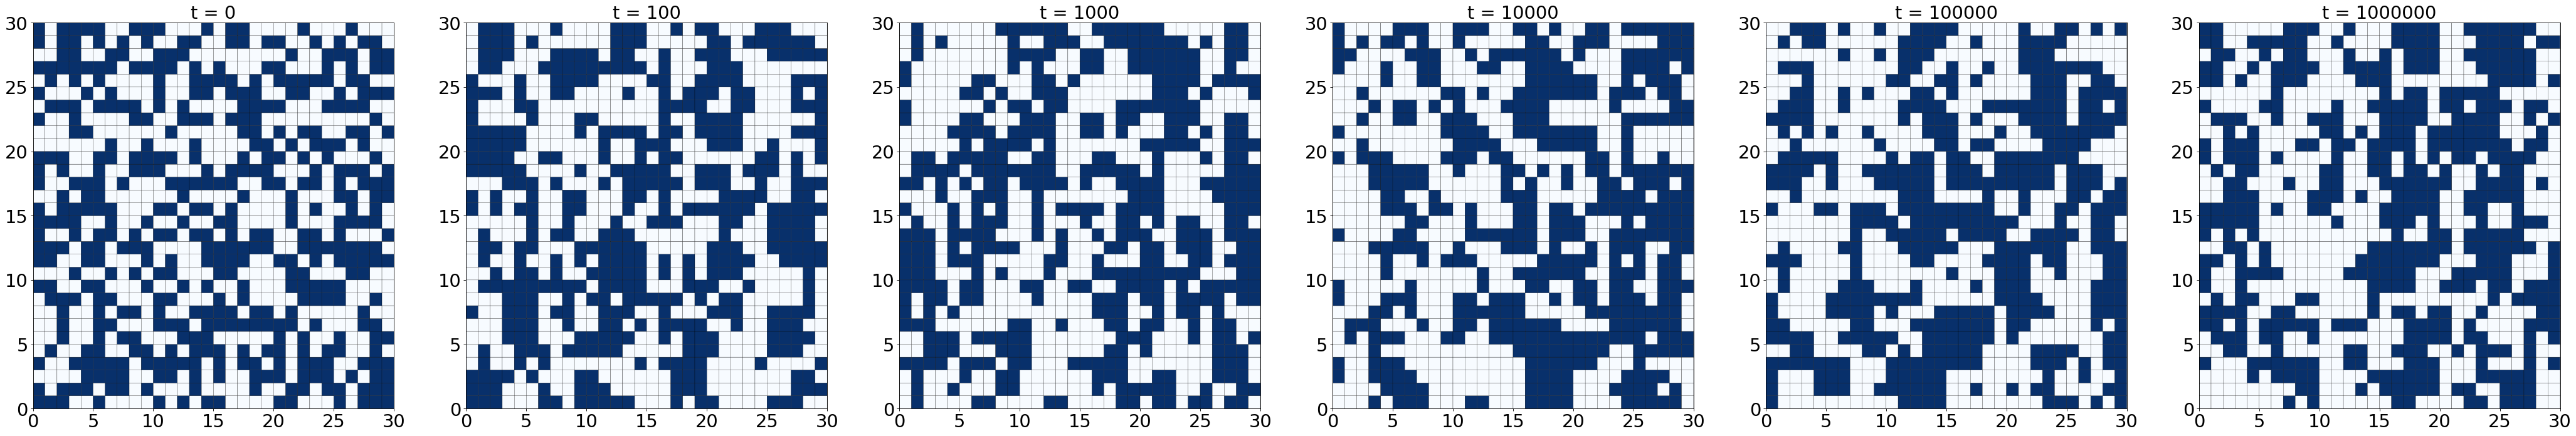

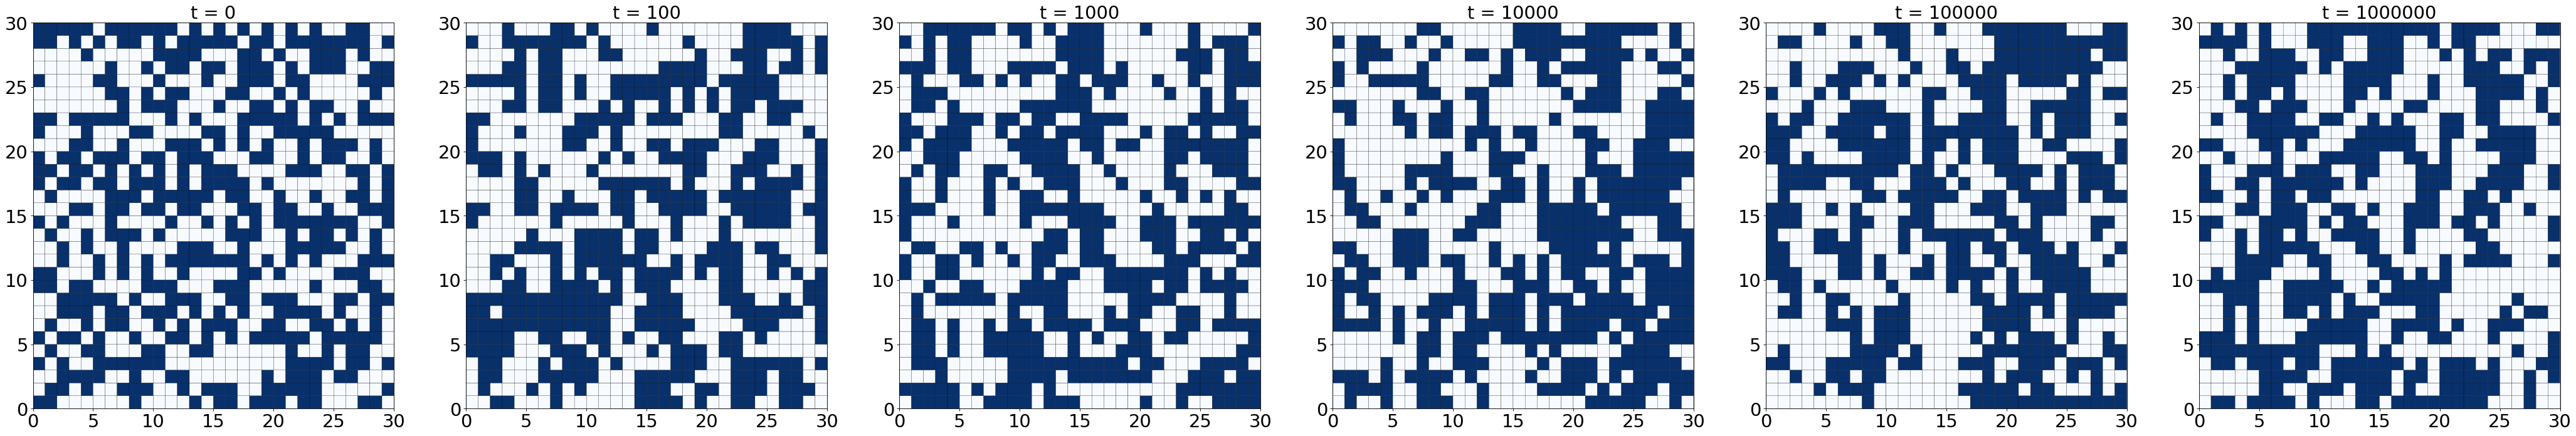

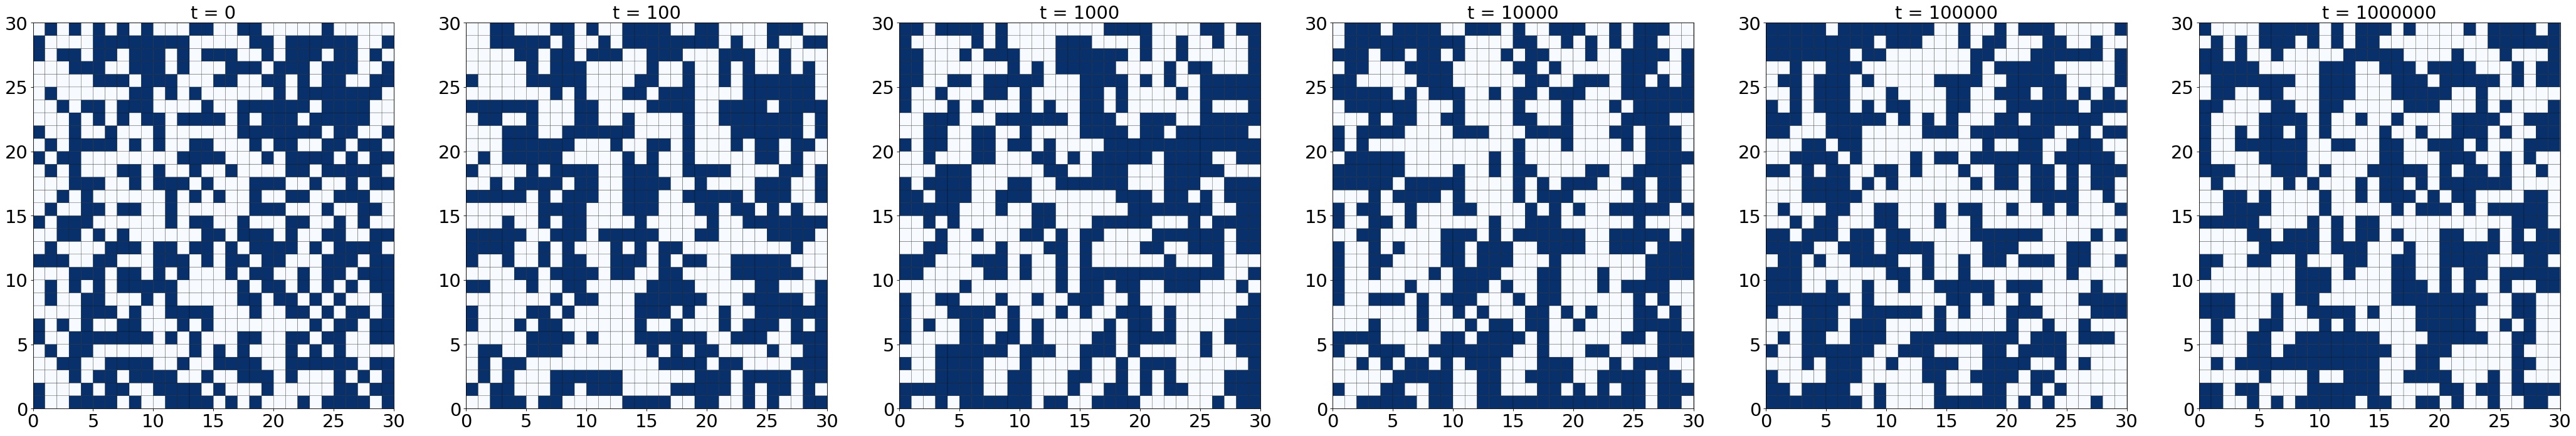

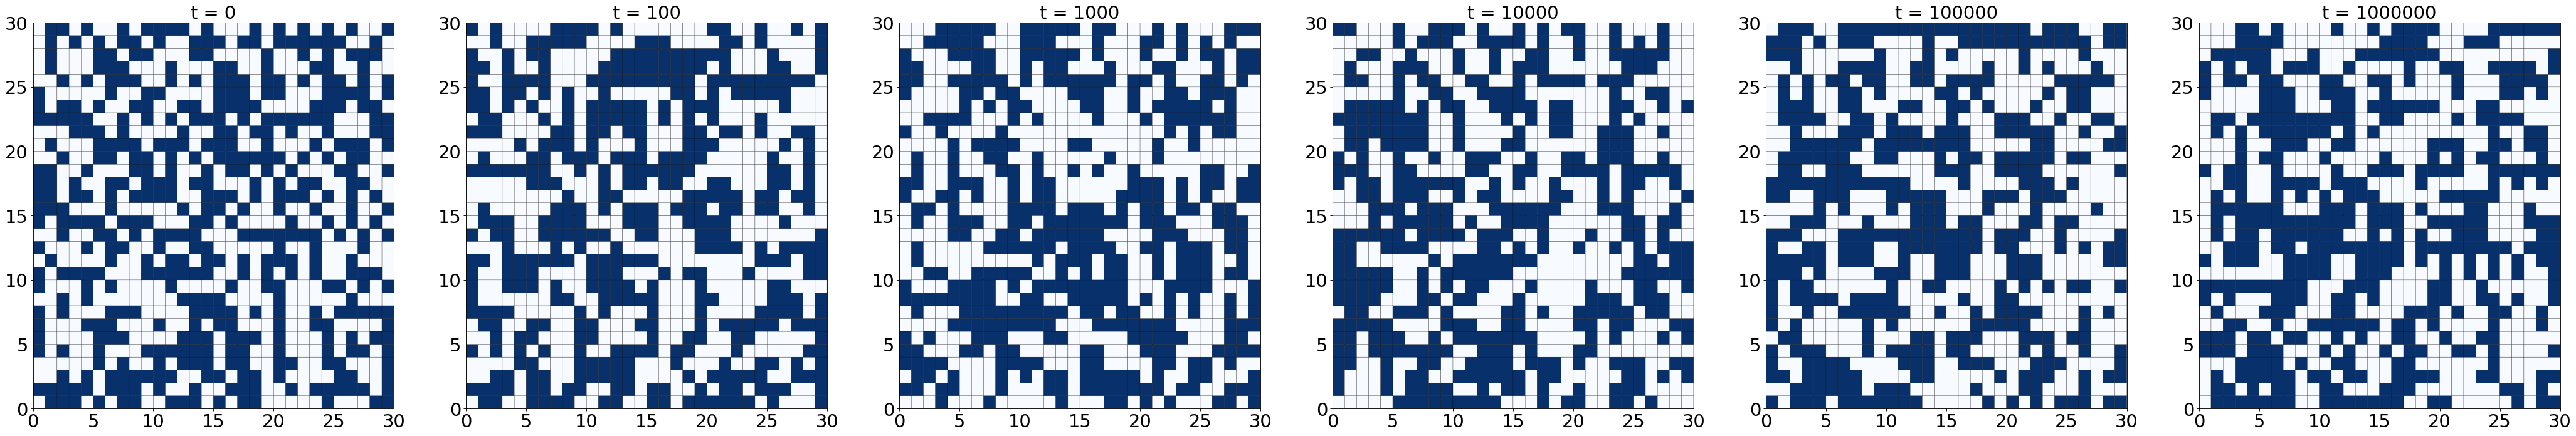

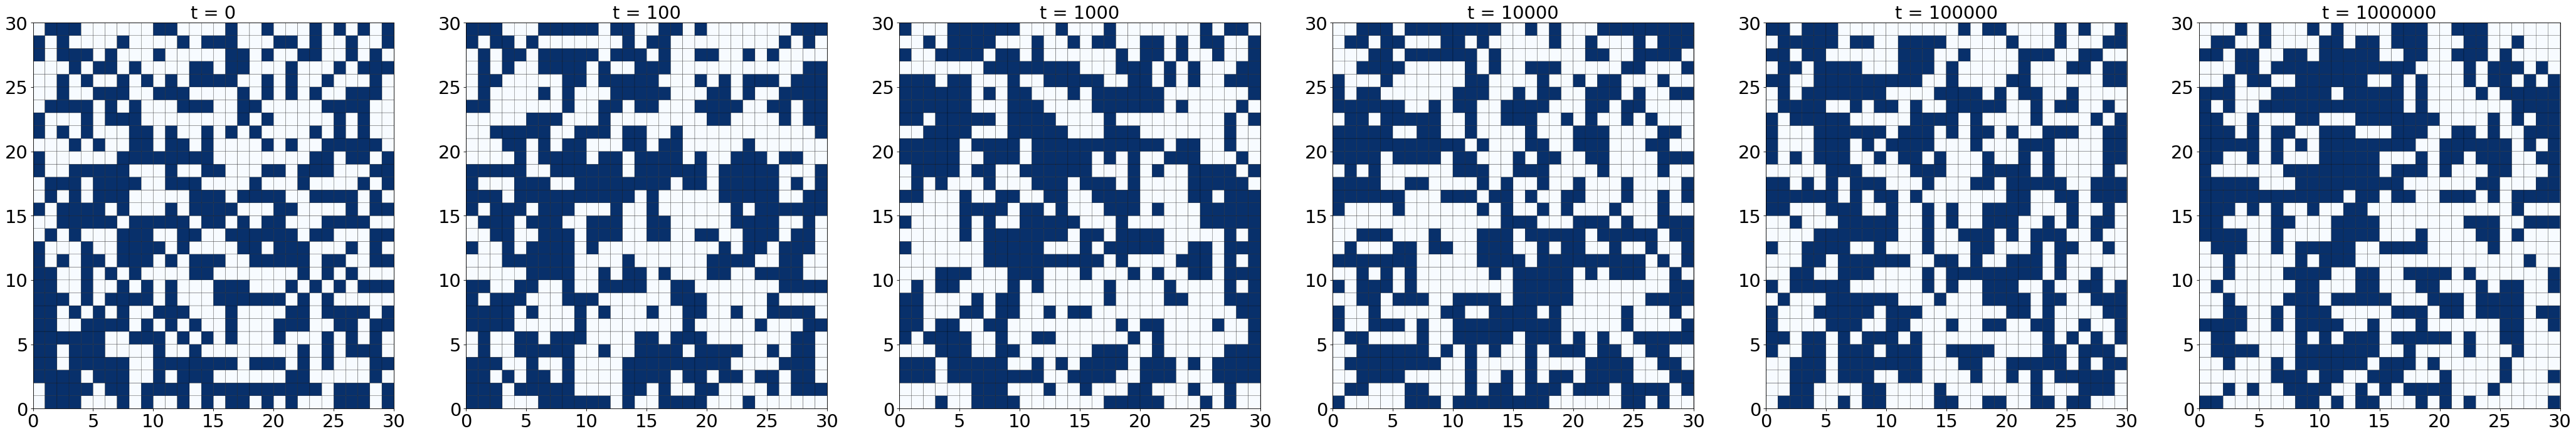

([0.30640540170381664, 0.2884565382505025, 0.25408495160375594, 0.1738872205484493, 0.06892425788178208, 0.043678383584838096, 0.03575873523008264, 0.031985739055999184, 0.02925385044042555, 0.026608844803462848], [1.8127556099664355e-5, 4.661203139651192e-5, 0.00015111623462245126, 0.0013677562648696513, 0.0009363373302929961, 0.0005064907331361669, 0.00034303975771141933, 0.0002624414589892631, 0.00021238115953458307, 0.00019209852050381665], [0.0063698864352147175, 0.010062081293101145, 0.014582046830826728, 0.01945913301083412, 0.021789138435431767, 0.021091553102752413, 0.020417389776799674, 0.01975770504162271, 0.019190840685734484, 0.019500194006977643], [1.2666477379920206e-5, 2.8763592637221827e-5, 5.988779768410288e-5, 0.00010564319083197845, 0.00013274321105222976, 0.0001195275154745504, 0.0001188088141957619, 0.00010468309383642821, 0.00010053323141201681, 0.0001041531693444567])

In [157]:
psiH, psiHVar, psiV, psiVVar = OvsTemp(30, 30, 0.5, 5, 1.8, 5, 1000000)
#simulate(30, 30, 0.5, 0, 1, 2000000)

In [158]:
minTemp = 1.5
maxTemp = 4.0
Temp = range(minTemp; stop=maxTemp, length=10)

1.5:0.2777777777777778:4.0

Here is the plot of the order parameters.  We can see the one measuring the horizontal order measures the transition

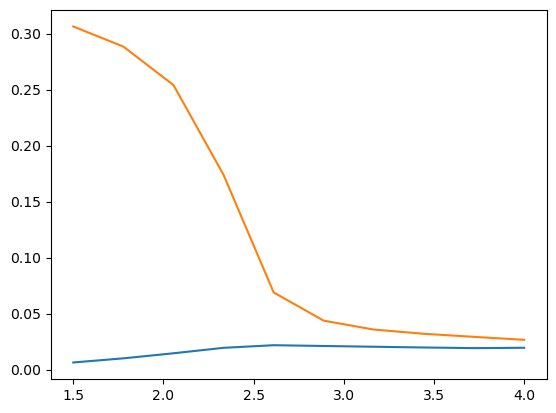

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x349abf890>

In [160]:
plt.plot(Temp, psiV)
plt.plot(Temp, psiH)

Here is the plot of the variance of theorder parameters.  This can be used to identify the phase transition

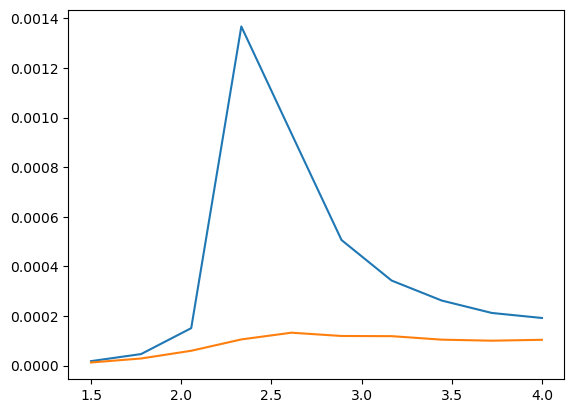

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x3485f95b0>

In [162]:
plt.plot(Temp, psiHVar)
plt.plot(Temp, psiVVar)